In [6]:
import matplotlib.pylab as plt
import numpy as np

In [7]:
#Initial condition
def initial():
    D    = 15 #time of infection
    gama = 1. / D
    print(gama)
    R0 = 7
    beta = gama*R0
    print("gamma=", gama)
    print("Duration:" , (1/gama))
    print("Beta:" , beta)
    return beta, gama
beta, gama = initial()


0.06666666666666667
gamma= 0.06666666666666667
Duration: 15.0
Beta: 0.4666666666666667


0.06666666666666667
gamma= 0.06666666666666667
Duration: 15.0
Beta: 0.4666666666666667


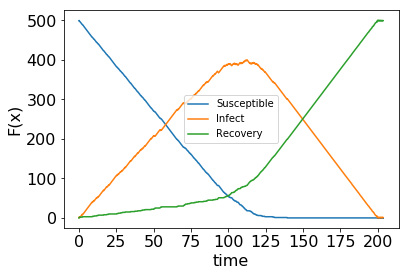

In [9]:
# Gillespie algorithm
# Input parameters ####################
import numpy as np
time = np.linspace(0, 200, 1000)    #Time of integration
t = time
initial()
beta, gama = 10, 0.5
N  = 500   # Total population
T = 100.0 # Maximum time
t1=0
n_I = 1 #initial infected population
n_S = N - n_I
n_R = 0
# Initialize results list
SIR_data = []
SIR_data.append((t1, n_S, n_I, n_R))

for t1 in time:
 
    if (n_I == 0):
        break
    

    w1 = beta * n_S * n_I / N 
    w2 = gama * n_I
    W = w1 + w2
    r1  = np.random.random()
    dt = - np.log(r1) / W
    
    t1  = t1 + dt
    r2  = np.random.random()
    
    if(r2 < w1 / W):
    
        n_S = n_S - 1
        n_I = n_I + 1
    
    else:
        n_I = n_I - 1
        n_R = n_R + 1

    SIR_data.append((t1, n_S, n_I, n_R))

y1 = np.transpose(SIR_data)

t1 = y1[0]
size = 16
plt.figure(figsize=(6,4))
plt.plot(t1, y1[1], label = "Susceptible")
plt.plot(t1, y1[2], label = "Infect")
plt.plot(t1, y1[3], label = "Recovery")
plt.xlabel("time", fontsize = size)
plt.ylabel("F(x)", fontsize = size)
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.legend()
plt.show()
